In [9]:
##installs pytorch on a cuda-capable windows machine using pip

%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

%pip install torchsummary

%pip install numpy

%pip install matplotlib

%pip install opencv-python

%pip install scikit-learn

%pip install pandas

%pip install tqdm

%pip install pickle5

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.Collecting pickle5
  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata

  error: subprocess-exited-with-error
  
  × Building wheel for pickle5 (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-311\pickle5
      copying pickle5\pickle.py -> build\lib.win-amd64-cpython-311\pickle5
      copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-311\pickle5
      copying pickle5\__init__.py -> build\lib.win-amd64-cpython-311\pickle5
      creating build\lib.win-amd64-cpython-311\pickle5\test
      copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-311\pickle5\test
      copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-311\pickle5\test
      copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-311\pickle5\test
      copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-311\pickle5\test
      running build_ext
      building 'pickle5._pickle' exte

In [10]:
import torch
import torch.nn as nn
import os
import cv2
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import warnings
from copy import deepcopy
from tqdm import tqdm
warnings.filterwarnings('ignore')
from torchvision import models
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [11]:
if(os.path.split(os.getcwd())[1] == "Transfer_Learning"):
    os.chdir("..")
print("Current Working Directory: {}".format(os.path.split(os.getcwd())[1]))
cuda =torch.cuda.is_available()
print(cuda)

Current Working Directory: progettoVIPM
True


In [12]:
from utils.loadersAndEnums import datasets
from utils.loadersAndEnums import networks
from utils.loadersAndEnums import ImageDataset
from utils.fine_tune_pytorch import train_model, eval_model_on_test_loader

In [13]:
chosen_net = networks.GOOGLENET
print(chosen_net)

networks.GOOGLENET


In [14]:
# t sta per "tensor", ovvero il vettore sulla gpu, mentre "n" sta per "numpy", ovvero il vettore sulla cpu

in_channel = 3
num_classes = 251
learning_rate = 1e-3
batch_size = 128
num_epochs = 10

In [22]:
net = deepcopy(chosen_net.value[1])
for param in net.parameters():
    param.requires_grad = False
net.fc = nn.Sequential(nn.Linear(in_features=1024,out_features=512),
    nn.ReLU(),
    nn.Linear(in_features=512,out_features=251)
    )
for param in net.parameters():
    print(param.requires_grad)

if cuda:
    net.cuda()

dataset_holder = ImageDataset(dataset=datasets.TRAINING_LABELED, network_input_size=chosen_net.value[0], cuda=cuda, transform=None, y_cuda = True)
train_dataset, val_dataset = torch.utils.data.random_split(dataset_holder, [0.9, 0.1])

training_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
validation_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

dataset_holder = ImageDataset(dataset=datasets.TEST, network_input_size=chosen_net.value[0], cuda=cuda, transform=None, y_cuda = True)
test_loader = DataLoader(dataset=dataset_holder, shuffle=False, batch_size=1)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [8]:
trained_model, losses, accuracies = train_model(training_loader, validation_loader, n_epochs=num_epochs, model=net, loss_function=criterion, optimizer=optimizer)


EPOCH 1:


KeyboardInterrupt: 

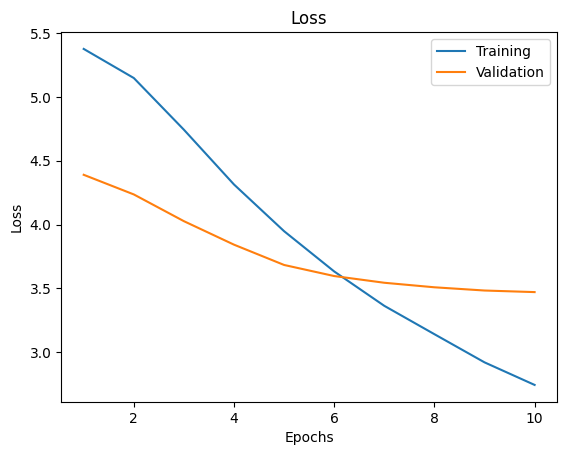

In [10]:
def plot_loss(history):
  x_plot = list(range(1,len(history)+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history[:,0])
  plt.plot(x_plot, history[:,1])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history)+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history[:,0])
  plt.plot(x_plot, history[:,1])
  plt.legend(['Training', 'Validation'])


# print(losses)
plot_loss(losses)
plot_accuracy(accuracies)

In [13]:
cm = eval_model_on_test_loader(trained_model, model_name="Alexnet", target_dir="Transfer_Learning", test_loader=test_loader, cuda=cuda)
torch.save(trained_model, "finetunedGoogLeNet.pth")

100%|██████████| 94/94 [17:18<00:00, 11.04s/it]


UnboundLocalError: cannot access local variable 'y_test' where it is not associated with a value

In [23]:
net = (torch.load("finetunedGoogLeNet.pth"))
cm = eval_model_on_test_loader(net, model_name="GoogLeNet_10_epochs", target_dir="Transfer_Learning", test_loader=test_loader, cuda=cuda)


100%|██████████| 11994/11994 [05:24<00:00, 36.94it/s]

Accuracy: 0.17525429381357346
